In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/hades/projects/msci-wiki/plots':
  os.chdir(r'/hades/projects/msci-wiki/plots')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_1921/2352873013.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.11/importlib/_bootstrap.py": 1693664193.0, "/usr/lib/python3.11/importlib/_bootstrap_external.py": 1693664193.0, "/usr/lib/python3.11/zipimport.py": 1693664193.0, "/usr/lib/python3.11/codecs.py": 1693664193.0, "/usr/lib/python3.11/encodings/aliases.py": 1693664193.0, "/usr/lib/python3.11/encodings/__init__.py": 1693664193.0, "/usr/lib/python3.11/encodings/utf_8.py": 1693664193.0, "/usr/lib/python3.11/abc.py": 1693664193.0, "/usr/lib/python3.11/io.py": 1693664193.0, "/usr/lib/python3.11/stat.py": 1693664193.0, "/usr/lib/python3.11/_collections_abc.py": 1693664193.0, "/usr/lib/python3.11/genericpath.py": 1693664193.0, "/usr/lib/python3.11/posixpath.py": 1693664193.0, "/usr/lib/python3.11/os.py": 1693664193.0, "/usr/lib/python3.11/_sitebuiltins.py": 1693664193.0, "/usr/lib/python3.11/types.py": 1693664193.0, "/usr/lib/python3.11/warnings.py": 1693664193.0, "/usr/lib/python3.11/importlib/__init__.py": 1693664193.0, "/usr/lib/python3.11/importlib/_abc.py": 1693664193.0, "

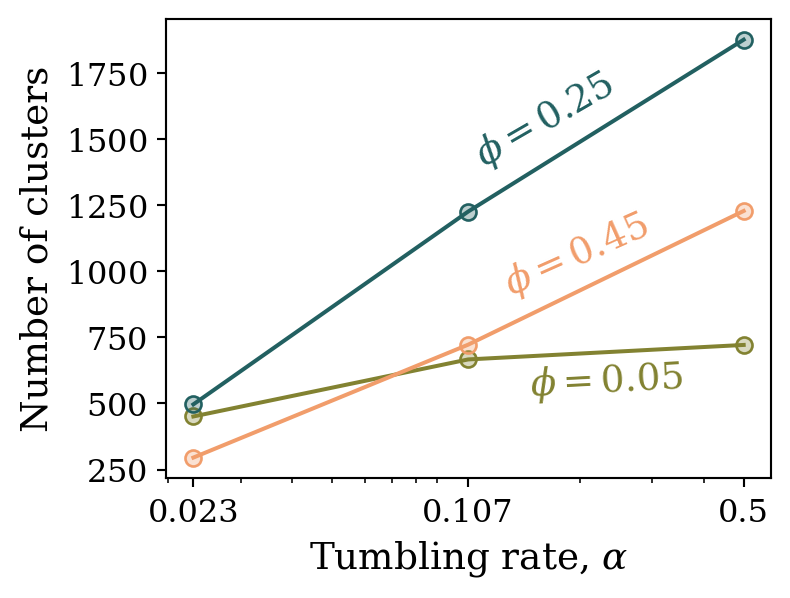

In [2]:
import os
os.chdir("/hades/projects/persistent-exclusion-process/src")

from utils import get_ds_iters
from plot_utils import get_plot_configs

import h5py
import glob

from scipy import ndimage
import matplotlib.pyplot as plt
from cmcrameri import cm
import numpy as np

plot_configs = get_plot_configs()
plot_configs["xtick.labelsize"] = 12
plot_configs["ytick.labelsize"] = 12
plt.rcParams.update(plot_configs)

fig, (axis) = plt.subplots(
    1,
    1,
    figsize=(4, 3),
    constrained_layout=True
)
axis.set_xscale("log")
files = glob.glob("../bp_data/dataset*")
sizes = np.zeros_like(files, dtype=np.float_)
kernel = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
for idx, f in enumerate(sorted(files)):
    hf = h5py.File(f, "r")
    iters = get_ds_iters(hf.keys())
    num = []
    for iter in range(len(iters)):
        img = hf[f"conf_{iters[iter]}"]
        _, nlabels = ndimage.label(img, structure=kernel)
        num.append(nlabels)
    sizes[idx] = np.mean(num)

axis.plot([0.023, 0.107, 0.500], sizes[0::3], marker="o", c=cm.batlowS(2), mfc=cm.batlowS(2,0.3), mec=cm.batlowS(2))
axis.text(x=0.6, y=0.18, rotation=3, transform=axis.transAxes, s=r"$\phi = 0.05$", c=cm.batlowS(2))
axis.plot([0.023, 0.107, 0.500], sizes[1::3], marker="o", c=cm.batlowS(3), mfc=cm.batlowS(3,0.3), mec=cm.batlowS(3))
axis.text(x=0.5, y=0.68, rotation=30, transform=axis.transAxes, s=r"$\phi = 0.25$", c=cm.batlowS(3))
axis.plot([0.023, 0.107, 0.500], sizes[2::3], marker="o", c=cm.batlowS(4), mfc=cm.batlowS(4,0.3), mec=cm.batlowS(4))
axis.text(x=0.55, y=0.4, rotation=24, transform=axis.transAxes, s=r"$\phi = 0.45$", c=cm.batlowS(4))
axis.set_xlabel(r"Tumbling rate, $\alpha$")
axis.set_ylabel(r"Number of clusters")
axis.set_xticks([0.023, 0.107, 0.500], labels=[0.023, 0.107, 0.500])
fig.savefig("../plots/num_labels.pdf")